# Generating Kenya Tempatrature Sprial 


 The goal of this project is to create an animated spiral of Kenya's variation in temperature from 1991 to 2016.

Background: Ed Hawkins, a climate scientist, unveiled an animated visualization in 2017 which captivated the world. This visualization showed the deviations of the global average temperature from 1850 to 2017. It was reshared millions of times over Twitter and Facebook and a version of it was even shown at the opening ceremony for the Rio Olympics.

This animation is created with the help of https://www.dataquest.io/blog/climate-temperature-spirals-python/ written by Srini Kadamati.

Historical weather data was retrieved from africa open data https://africaopendata.org/dataset/kenya-climate-data-1991-2016 

The data was collected by the climate knowledge portal by the World Bank.

In [93]:
#importing libraries I'll use 
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.animation as animation



In [94]:
#reading the temperature file into a pandas dataframe
temp_data = pd.read_csv(
    "temp data.csv",
    delim_whitespace=True,
    usecols=[0, 1],
    header=None)

In [95]:
temp_data


,0,1
0,"Year,Month","Average,Temperature"
1,"1991,Jan","Average,25.1631"
2,"1991,Feb","Average,26.0839"
3,"1991,Mar","Average,26.2236"
4,"1991,Apr","Average,25.5812"
...,...,...
308,"2016,Aug","Average,24.0942"
309,"2016,Sep","Average,24.437"
310,"2016,Oct","Average,26.0317"
311,"2016,Nov","Average,25.5692"


In [96]:
temp_data.describe()

,0,1
count,313,313
unique,313,313
top,"Year,Month","Average,Temperature"
freq,1,1


I'll need to separate year,month and average,temperature

In [97]:
temp_data['Year'] = temp_data.iloc[:,0].apply(lambda x: x.split("/")[0]).astype(str)
temp_data['Month'] = temp_data.iloc[:,0].apply(lambda x: x.split("/")[0]).astype(str)

In [98]:
temp_data.head()

,0,1,Year,Month
0,"Year,Month","Average,Temperature","Year,Month","Year,Month"
1,"1991,Jan","Average,25.1631","1991,Jan","1991,Jan"
2,"1991,Feb","Average,26.0839","1991,Feb","1991,Feb"
3,"1991,Mar","Average,26.2236","1991,Mar","1991,Mar"
4,"1991,Apr","Average,25.5812","1991,Apr","1991,Apr"


In [99]:
temp_data['Average'] = temp_data.iloc[:,1].apply(lambda x: x.split("/")[0]).astype(str)
temp_data['Temperature'] = temp_data.iloc[:,1].apply(lambda x: x.split("/")[0]).astype(str)

In [100]:
temp_data


,0,1,Year,Month,Average,Temperature
0,"Year,Month","Average,Temperature","Year,Month","Year,Month","Average,Temperature","Average,Temperature"
1,"1991,Jan","Average,25.1631","1991,Jan","1991,Jan","Average,25.1631","Average,25.1631"
2,"1991,Feb","Average,26.0839","1991,Feb","1991,Feb","Average,26.0839","Average,26.0839"
3,"1991,Mar","Average,26.2236","1991,Mar","1991,Mar","Average,26.2236","Average,26.2236"
4,"1991,Apr","Average,25.5812","1991,Apr","1991,Apr","Average,25.5812","Average,25.5812"
...,...,...,...,...,...,...
308,"2016,Aug","Average,24.0942","2016,Aug","2016,Aug","Average,24.0942","Average,24.0942"
309,"2016,Sep","Average,24.437","2016,Sep","2016,Sep","Average,24.437","Average,24.437"
310,"2016,Oct","Average,26.0317","2016,Oct","2016,Oct","Average,26.0317","Average,26.0317"
311,"2016,Nov","Average,25.5692","2016,Nov","2016,Nov","Average,25.5692","Average,25.5692"


In [101]:
temp_data[['Year', 'Month']] = temp_data['Year'].str.split(',', expand=True)
temp_data.head()

,0,1,Year,Month,Average,Temperature
0,"Year,Month","Average,Temperature",Year,Month,"Average,Temperature","Average,Temperature"
1,"1991,Jan","Average,25.1631",1991,Jan,"Average,25.1631","Average,25.1631"
2,"1991,Feb","Average,26.0839",1991,Feb,"Average,26.0839","Average,26.0839"
3,"1991,Mar","Average,26.2236",1991,Mar,"Average,26.2236","Average,26.2236"
4,"1991,Apr","Average,25.5812",1991,Apr,"Average,25.5812","Average,25.5812"


In [102]:
temp_data[['Average', 'Temparature']] = temp_data['Average'].str.split(',', expand=True)
temp_data.head()

,0,1,Year,Month,Average,Temperature,Temparature
0,"Year,Month","Average,Temperature",Year,Month,Average,"Average,Temperature",Temperature
1,"1991,Jan","Average,25.1631",1991,Jan,Average,"Average,25.1631",25.1631
2,"1991,Feb","Average,26.0839",1991,Feb,Average,"Average,26.0839",26.0839
3,"1991,Mar","Average,26.2236",1991,Mar,Average,"Average,26.2236",26.2236
4,"1991,Apr","Average,25.5812",1991,Apr,Average,"Average,25.5812",25.5812


In [103]:
temp_data_1 = temp_data.drop(temp_data.columns[[0, 1, 4, 5]], axis=1)

In [104]:
temp_data_1

,Year,Month,Temparature
0,Year,Month,Temperature
1,1991,Jan,25.1631
2,1991,Feb,26.0839
3,1991,Mar,26.2236
4,1991,Apr,25.5812
...,...,...,...
308,2016,Aug,24.0942
309,2016,Sep,24.437
310,2016,Oct,26.0317
311,2016,Nov,25.5692


In [105]:
#dropping the first repetitive row
temp_data_2 = temp_data_1.drop([temp_data_1.index[0]])

In [106]:
temp_data_2.head()

,Year,Month,Temparature
1,1991,Jan,25.1631
2,1991,Feb,26.0839
3,1991,Mar,26.2236
4,1991,Apr,25.5812
5,1991,May,24.6618


In [107]:
#getting to know what data types my dataframe has
temp_data_2.dtypes

Year           object
Month          object
Temparature    object
dtype: object

In [108]:
#This way, we are only modifying values in the value column (the actual temperature values)
#temp_data_2 = temp_data_2.set_index(['Year', 'Month'])

In [109]:
temp_data_2['Temparature'] = temp_data_2['Temparature'].astype(str).astype(float)

#view data types of each column
temp_data_2.dtypes

Year            object
Month           object
Temparature    float64
dtype: object

In [110]:
temp_data_2['Year'] = temp_data_2['Year'].astype(str).astype(float)


In [111]:
temp_data_2.dtypes

Year           float64
Month           object
Temparature    float64
dtype: object

In [112]:
temp_data_2['Temparature'] = temp_data_2['Temparature'].astype(str).astype(float)

In [113]:
temp_data_2.head(20)

,Year,Month,Temparature
1,1991.0,Jan,25.1631
2,1991.0,Feb,26.0839
3,1991.0,Mar,26.2236
4,1991.0,Apr,25.5812
5,1991.0,May,24.6618
6,1991.0,Jun,23.9439
7,1991.0,Jul,22.9982
8,1991.0,Aug,23.0391
9,1991.0,Sep,23.9423
10,1991.0,Oct,25.5236


In [114]:
# Define a function to convert month names to numbers
def month_string_to_number(string):
    dt = datetime.strptime(string, "%b")
    return dt.month
## Apply the function to the month column to convert to numbers
temp_data_2['month_number'] = temp_data_2['Month'].apply(month_string_to_number)

temp_data_2.head(20)

,Year,Month,Temparature,month_number
1,1991.0,Jan,25.1631,1
2,1991.0,Feb,26.0839,2
3,1991.0,Mar,26.2236,3
4,1991.0,Apr,25.5812,4
5,1991.0,May,24.6618,5
6,1991.0,Jun,23.9439,6
7,1991.0,Jul,22.9982,7
8,1991.0,Aug,23.0391,8
9,1991.0,Sep,23.9423,9
10,1991.0,Oct,25.5236,10


In [115]:
temp_data_2 = temp_data_2.drop('Month', axis=1)


In [116]:
temp_data_2.head()

,Year,Temparature,month_number
1,1991.0,25.1631,1
2,1991.0,26.0839,2
3,1991.0,26.2236,3
4,1991.0,25.5812,4
5,1991.0,24.6618,5


In [117]:
temp_data_2.isnull().sum()

Year            0
Temparature     0
month_number    0
dtype: int64

In [118]:
temp_data_2.columns

Index(['Year', 'Temparature', 'month_number'], dtype='object')

In [119]:
temp_data_2.index

RangeIndex(start=1, stop=313, step=1)

In [120]:
#To only find the mean of the temperature column and subtract the mean from each individual value in the temperature column
mean_temp = temp_data_2['Temparature'].mean()
temp_data_2['Temparature'] = temp_data_2['Temparature'].apply(lambda x: x - mean_temp)

In [121]:
temp_data_2

,Year,Temparature,month_number
1,1991.0,0.044512,1
2,1991.0,0.965312,2
3,1991.0,1.105012,3
4,1991.0,0.462612,4
5,1991.0,-0.456788,5
...,...,...,...
308,2016.0,-1.024388,8
309,2016.0,-0.681588,9
310,2016.0,0.913112,10
311,2016.0,0.450612,11


In [122]:
temp_data_2

,Year,Temparature,month_number
1,1991.0,0.044512,1
2,1991.0,0.965312,2
3,1991.0,1.105012,3
4,1991.0,0.462612,4
5,1991.0,-0.456788,5
...,...,...,...
308,2016.0,-1.024388,8
309,2016.0,-0.681588,9
310,2016.0,0.913112,10
311,2016.0,0.450612,11


##Preparing data for polar plotting

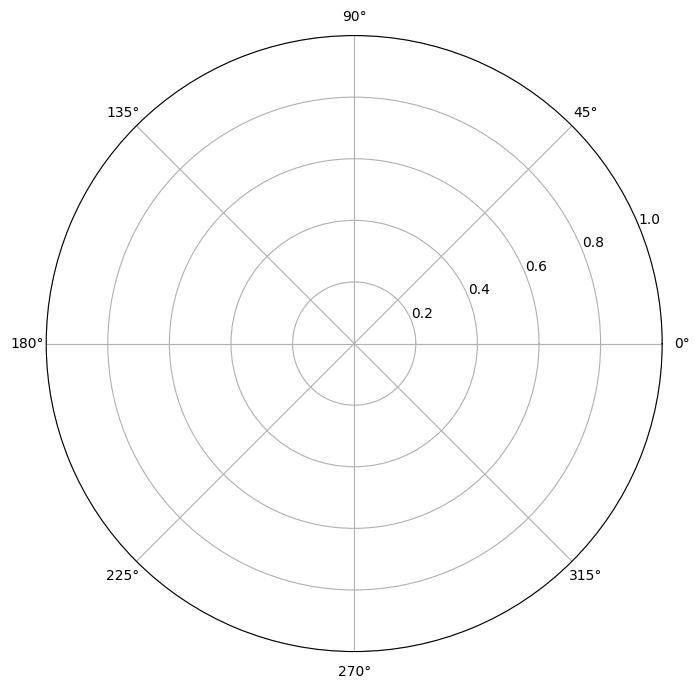

In [123]:
fig = plt.figure(figsize=(8,8))
ax1 = plt.subplot(111, projection='polar')

In [124]:
temp_data_2['Temparature'].min()

-2.3378881410256405

I'll add

2 to all temperature values, so they'll be positive but there's still some space reserved around the origin for displaying text:



In [125]:
temp_data_2.dtypes

Year            float64
Temparature     float64
month_number      int64
dtype: object

In [126]:
temp_data_2['Temparature'].max()

2.6321118589743584

In [127]:
full_circle_thetas=np.linspace(0,2*np.pi,1000)
blue_one_radii=[0.0+1.0]*1000
red_one_radii=[1.5+1.0]*1000
red_two_radii=[2.0+1.0]*1000
red_three_radii=[2.5+1.0]*1000
red_four_radii=[3.0+1.0]*1000
red_four_radii=[3.5+1.0]*1000


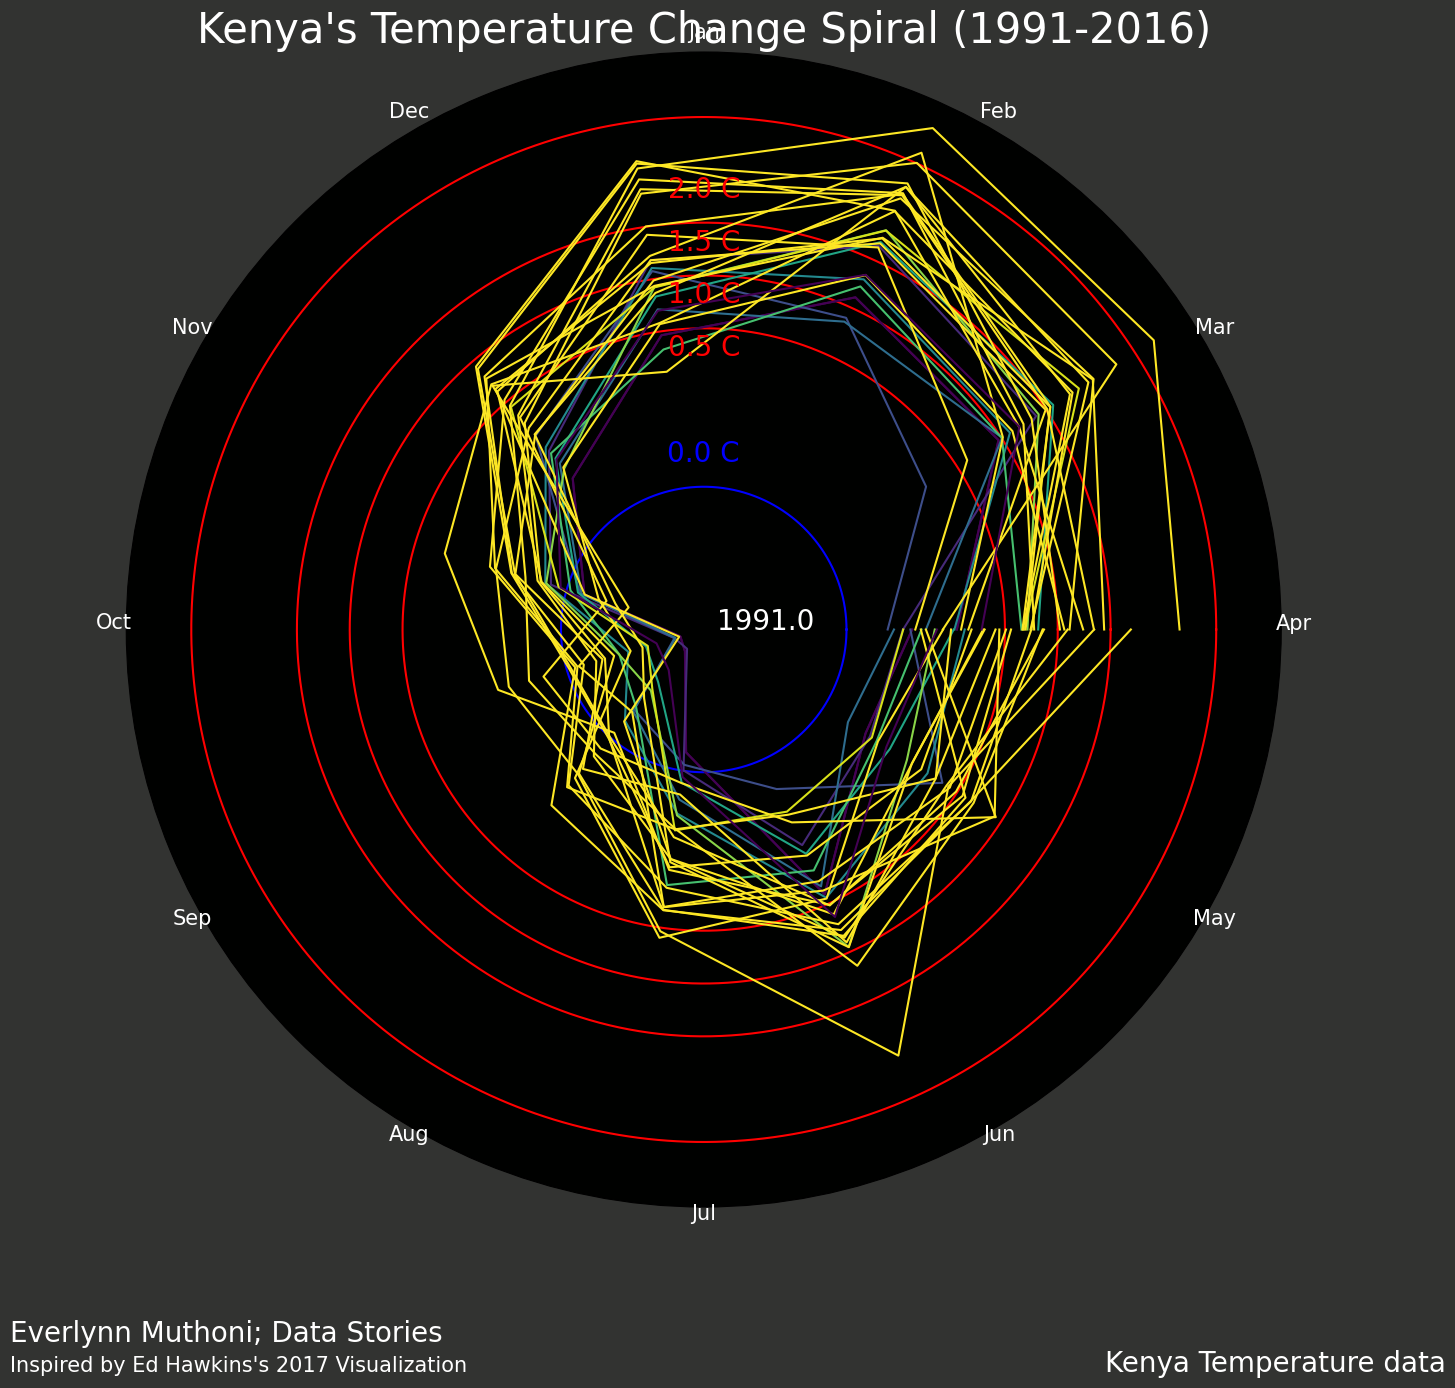

In [128]:
from mpl_toolkits.mplot3d import Axes3D 
months=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
fig=plt.figure(figsize=(15,15))
ax1=plt.subplot(111,projection="polar")

ax1.plot(full_circle_thetas, blue_one_radii, c='blue')
ax1.plot(full_circle_thetas, red_one_radii, c='red')
ax1.plot(full_circle_thetas, red_two_radii, c='red')
ax1.plot(full_circle_thetas, red_three_radii, c='red')
ax1.plot(full_circle_thetas, red_four_radii, c='red')

#fig.set_facecolor() to set the foreground color and Axes.set_axis_bgcolor() to set the background color of the plot:
fig.set_facecolor("#323331")
#ax1.set_ylim(0, 3.25)

ax1.text(np.pi/2, 1.0, "0.0 C", color="blue", ha='center', fontdict={'fontsize': 20})
ax1.text(np.pi/2, 2.0, "0.5 C", color="red", ha='center', fontdict={'fontsize': 20})
ax1.text(np.pi/2, 2.5, "1.0 C", color="red", ha='center', fontdict={'fontsize': 20})
ax1.text(np.pi/2, 3.0, "1.5 C", color="red", ha='center', fontdict={'fontsize': 20})
ax1.text(np.pi/2, 3.5, "2.0 C", color="red", ha='center', fontdict={'fontsize': 20})


ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_xticklabels([])
ax1.set_yticklabels([])


theta = np.linspace(0, 2*np.pi, 12)


ax1.set_title("Kenya's Temperature Change Spiral (1991-2016)", color='white', fontdict={'fontsize': 30})
ax1.set_facecolor('#000100')

years = temp_data_2['Year'].unique()

fig.text(0.78,0,"Kenya Temperature data",color="white",fontsize=20)
fig.text(0.05,0.02,"Everlynn Muthoni; Data Stories",color="white",fontsize=20)
fig.text(0.05,0,"Inspired by Ed Hawkins's 2017 Visualization",color="white",fontsize=15)

#add months ring
months_angles= np.linspace((np.pi/2)+(2*np.pi),np.pi/2,13)
for i,month in enumerate(months):
  ax1.text(months_angles[i],5.0,month,color="white",fontsize=15,ha="center")

#for index,Year in enumerate(years):
  #r=temp_data_2.loc[temp_data_2["Year"]== Year,"Temparature"]+2
  #ax1.plot(theta,r,c=plt.cm.viridis(index*15))

def update(i):
    # Remove the last year text at the center
    for txt in ax1.texts:
      if(txt.get_position()==(0,0)):
        txt.set_visible(False)
    # Specify how we want the plot to change in each frame.
    # We need to unravel the for loop we had earlier.
    Year = years[i]
    r = temp_data_2[temp_data_2['Year'] == Year]['Temparature'] + 2
    ax1.plot(theta, r, c=plt.cm.viridis(i*30))
    ax1.text(0,0,Year,fontsize=20,color="white",ha="center")
    return ax1

anim = animation.FuncAnimation(fig, update, frames=len(years), interval=10)


ffmpeg_writer = animation.FFMpegWriter();

anim.save("Spiral.gif", writer = 'pillow', fps = 5, dpi=100);




C:\Users\Administrator\AppData\Local\Temp\ipykernel_6632\1556798820.py:28: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(sm, shrink=0.5, aspect=10)


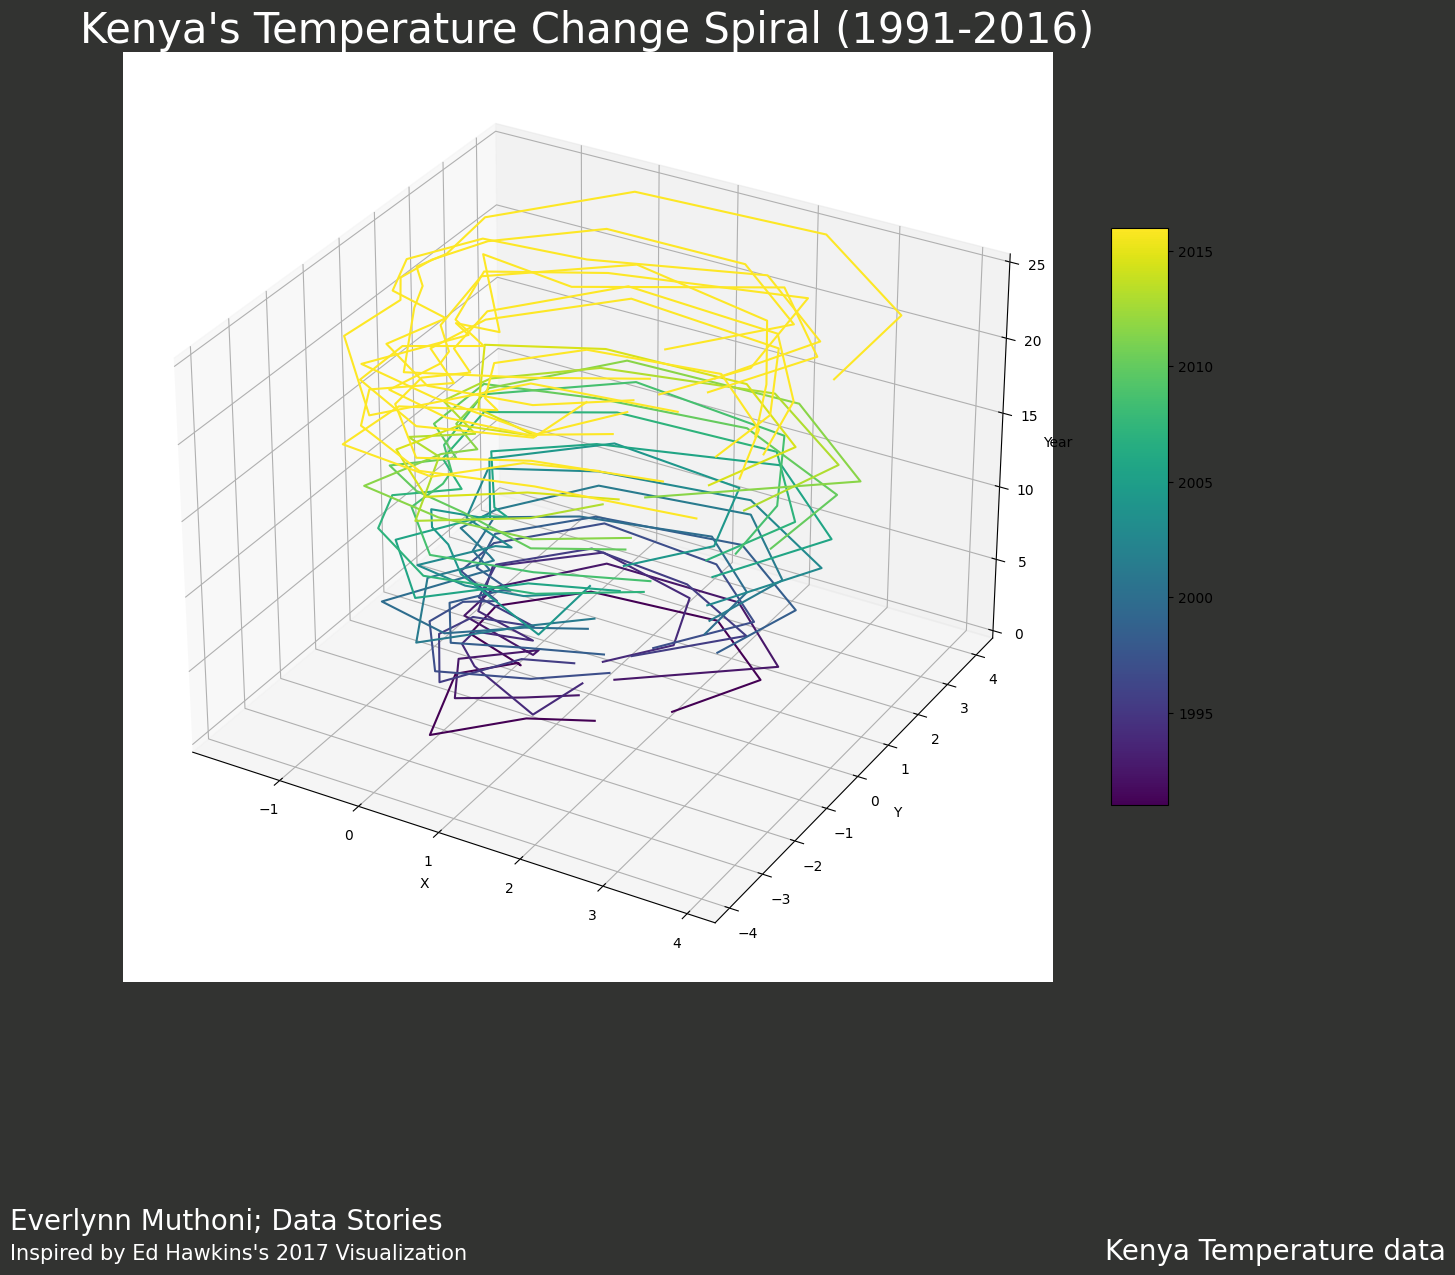

In [142]:
from mpl_toolkits.mplot3d import Axes3D 
months=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
fig=plt.figure(figsize=(15,15))
ax1=fig.add_subplot(111, projection='3d')

years = temp_data_2['Year'].unique()

# Create a surface plot for the temperature data
for index,Year in enumerate(years):
    theta = np.linspace(0, 2*np.pi, len(r)+1)[:-1]
    r=temp_data_2.loc[temp_data_2["Year"]== Year,"Temparature"]+2
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    z = np.full_like(theta, index)
    ax1.plot(x, y, z, c=plt.cm.viridis(index*15))

# Add labels and title
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Year')
ax1.set_title("Kenya's Temperature Change Spiral (1991-2016)", color='white', fontdict={'fontsize': 30})

fig.set_facecolor("#323331")

# Add a colorbar for the years
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=years.min(), vmax=years.max()))
sm._A = []
fig.colorbar(sm, shrink=0.5, aspect=10)

fig.text(0.78,0,"Kenya Temperature data",color="white",fontsize=20)
fig.text(0.05,0.02,"Everlynn Muthoni; Data Stories",color="white",fontsize=20)
fig.text(0.05,0,"Inspired by Ed Hawkins's 2017 Visualization",color="white",fontsize=15)

plt.show()


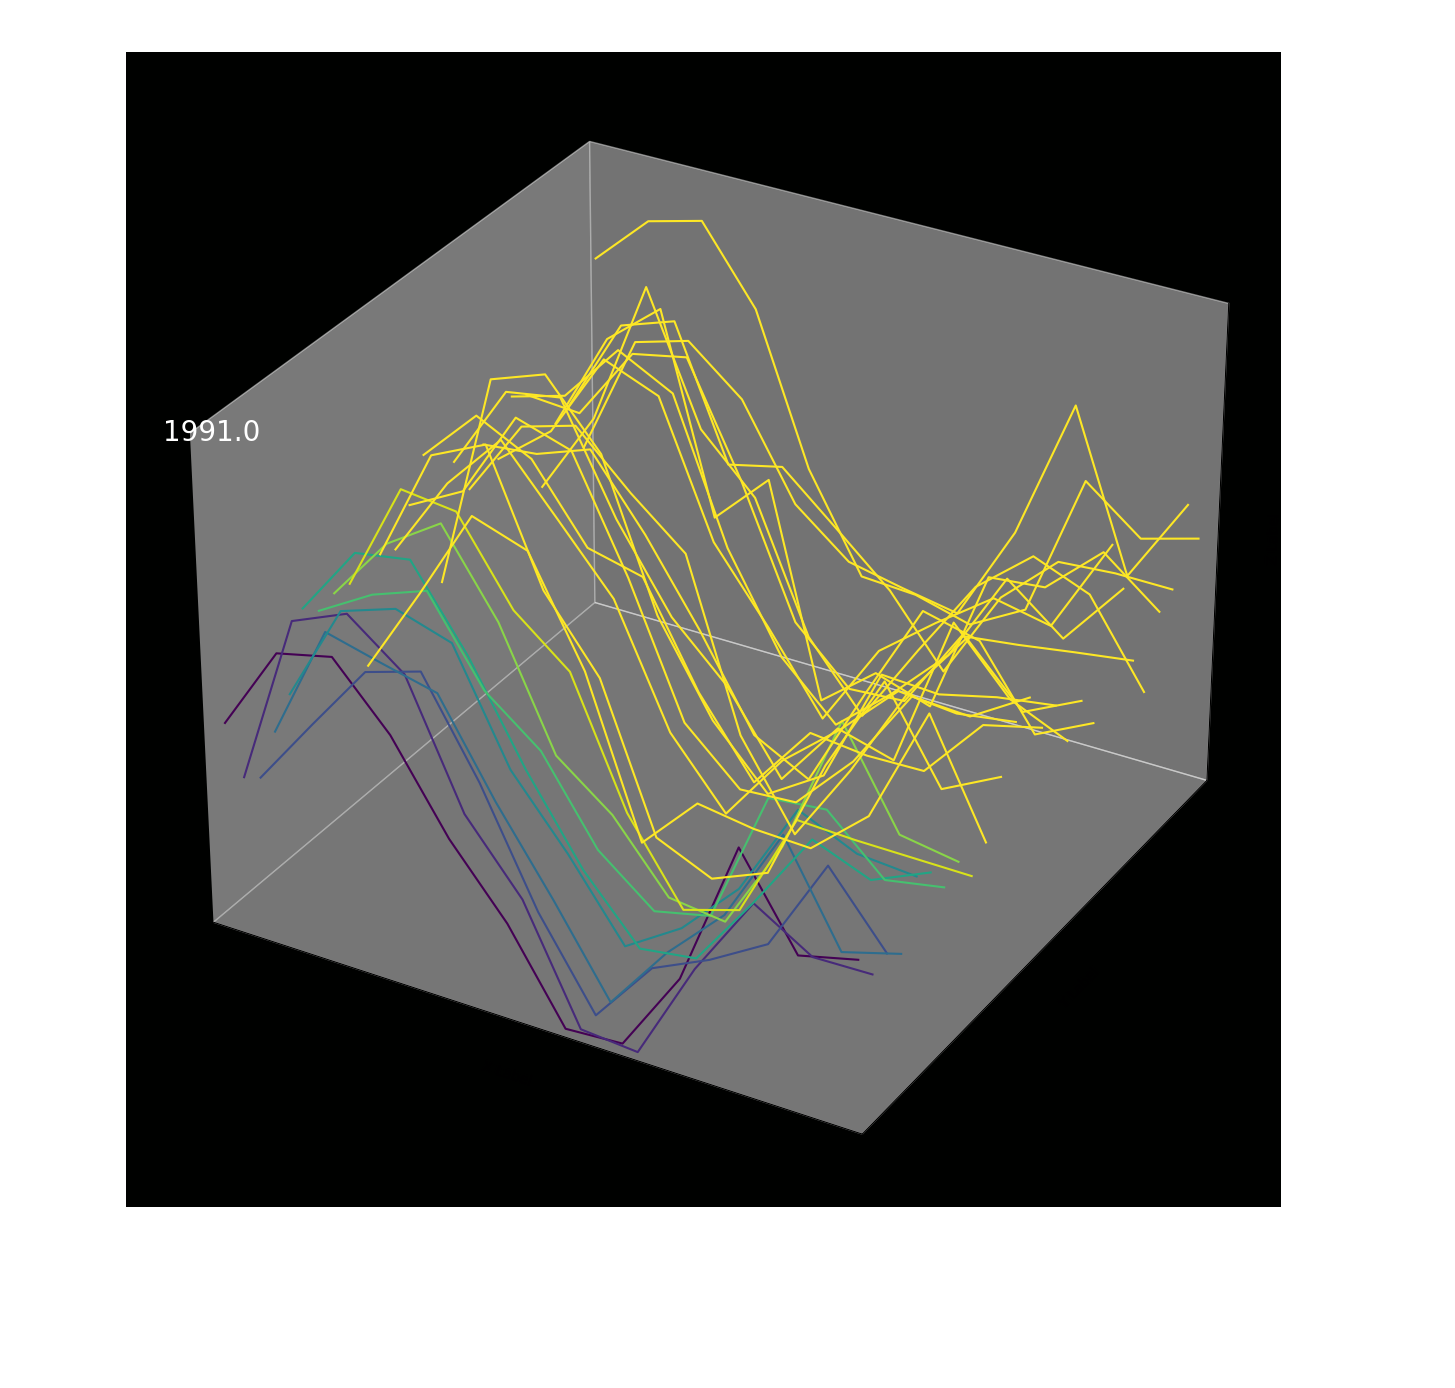

In [143]:
from mpl_toolkits.mplot3d import Axes3D 
months=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
fig=plt.figure(figsize=(15,15))
ax1=fig.add_subplot(111, projection='3d')

# Generate the temperature values for each year
years = temp_data_2['Year'].unique()
temperatures = []
for year in years:
    r = temp_data_2[temp_data_2['Year'] == year]['Temparature'] + 2
    temperatures.append(list(r))

# Create a spiral along the z-axis using the temperature values
theta = np.linspace(0, 2*np.pi, 12)
z = np.linspace(0, 2, len(years))
for i, temp_vals in enumerate(temperatures):
    ax1.plot(theta, np.ones(len(theta)) * z[i], temp_vals, c=plt.cm.viridis(i*30))

# Set the x, y, and z limits and labels
ax1.set_xlim([0, 2*np.pi])
ax1.set_ylim([0, 2])
ax1.set_zlim([0, 5])
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_zticks([])
ax1.set_xlabel('X Label')
ax1.set_ylabel('Y Label')
ax1.set_zlabel('Z Label')

ax1.set_title("Kenya's Temperature Change Spiral (1991-2016)", color='white', fontdict={'fontsize': 30})
ax1.set_facecolor('#000100')

fig.text(0.78,0,"Kenya Temperature data",color="white",fontsize=20)
fig.text(0.05,0.02,"Everlynn Muthoni; Data Stories",color="white",fontsize=20)
fig.text(0.05,0,"Inspired by Ed Hawkins's 2017 Visualization",color="white",fontsize=15)

def update(i):
    # Remove the last year text at the center
    for txt in ax1.texts:
        if(txt.get_position()==(0,0)):
            txt.set_visible(False)
    # Add the year as text at the center
    Year = years[i]
    ax1.text(0, 0, 5, Year, fontsize=20, color="white", ha="center")
    return ax1

anim = animation.FuncAnimation(fig, update, frames=len(years), interval=10)

ffmpeg_writer = animation.FFMpegWriter();
anim.save("Spiral.gif", writer = 'pillow', fps = 5, dpi=100);
